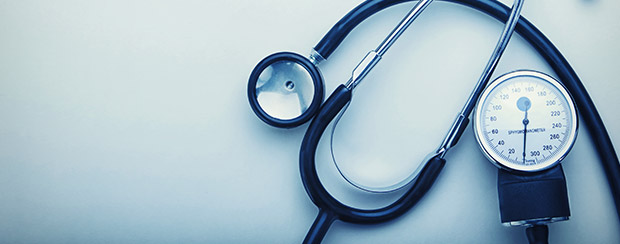

# Introduction

Medical expenses is one of the major recurring expenses in a human life. Its a common knowledge that one life style and various physical parameters dictates diseases or ailments one can have and these ailments dictates medical expanses. According various studies, major factors that contribute to higher expenses in personal medical care include smoking, aging, BMI. In this study, we aims to find a correlation between personal medical expenses and different factors, and compare them. Then we use the prominent attributes as predictors to predict medical expenses by creating linear regression models.

# Problem Statement

For a health insurance company to make money, it needs to collect more in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.


The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, depending on the expected treatment costs.

#  Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd


In [ ]:
# Read the given CSV file, and view some sample records

medical = pd.read_csv('../input/insurance/insurance.csv')
medical.head()

### Let's inspect the various aspects of our dataframe

In [ ]:
#Determining the number of rows and columns
medical.shape

In [ ]:
medical.describe()  #summary of all the numeric columns in the dataset

In [ ]:
medical.info()  #Datatypes of each column

In [ ]:
#Checking missing values
medical.isnull().sum()

* ### No missing values in the dataset

Notice that sex and smoker are categorical features with 2 different values each? Let's convert them to a numerical feature--to be specific boolean values. Using the map function, we'll set these values:

Male = 0; Female = 1
Non-somker = 0; Smoker = 1

In [ ]:
#Mapping
medical['sex'] = medical['sex'].map({'male': 0, 'female': 1})
medical['smoker'] = medical['smoker'].map({'yes': 1, 'no': 0})
medical.head()

## Step 2: Data Visualization

In [ ]:
#Import necessary libraies
import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Variables

In [ ]:
#Binning the age column.
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']

medical['Age_range']=pd.cut(medical['age'],bins=bins,labels=slots)

In [ ]:
medical.head()

In [ ]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

medical.nunique().sort_values()

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables,  to visualise which variables are most correlated to the target variable 'charges'.

In [ ]:
#Pairplot of all numerical variables
sns.pairplot(medical, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

By analysing all the plots above, we can see that,
- A trend of increasing charges can be observed from the age vs charge plot. 
- BMI seems to hold some correlation to charges. 
- There seems to be a strong correlation between smoking and medical charges

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [ ]:
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = medical)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = medical,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'charges', data = medical, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = medical,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age_range', y = 'charges', data = medical, palette= 'husl')
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()


##### From the plot above we can see that.

#### 1. Medical Charges are more for smoker than the non smoker.

#### 2. Medical Charges are more in Southeast Region

#### 3. Senior Adults are charged more

 ##### Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='sex', data=medical, palette='Paired')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=medical, palette='cool')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=medical, palette='Set1')
plt.show()

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=medical, hue='smoker', palette='inferno')
plt.show()

From above plot we can see that, Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

### Heatmap

In [ ]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(medical.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

## Step 3: Data Preparation

In [ ]:
medical.head()

In [ ]:
# # Get the dummy variables for region and age range
region=pd.get_dummies(medical.region,drop_first=True)
Age_range=pd.get_dummies(medical.Age_range,drop_first=True)
children= pd.get_dummies(medical.children,drop_first=True,prefix='children')


In [ ]:
# Add the results to the original bike dataframe
medical=pd.concat([region,Age_range,children,medical],axis=1)
medical.head()

In [ ]:
#Drop region and age range as we are created a dummy
medical.drop(['region', 'Age_range', 'age','children'], axis = 1, inplace = True)
medical.head()

In [ ]:
# Now lets see the number of rows and columns
medical.shape

In [ ]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 10))
sns.heatmap(medical.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
medical_train, medical_test = train_test_split(medical, train_size = 0.7, random_state = 100)

In [ ]:
print(medical_train.shape)
print(medical_test.shape)

### Rescaling the Features

#### Min- Max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
medical.head()

In [ ]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['bmi','charges']

#Fit on data
medical_train[num_vars] = scaler.fit_transform(medical_train[num_vars])
medical_train.head()

### Dividing into X and Y sets for the model building

In [ ]:
#Divide the data into X and y
y_train = medical_train.pop('charges')
X_train = medical_train

## Step 5: Building a Linear Model

### RFE


#### Recursive Feature Elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 8)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

In [ ]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [ ]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Now lets drop the variable having high p value. We can see children_5 has high p value.

In [ ]:
#Drop children_5
X_train_new1 = X_train_rfe.drop(["children_5"], axis = 1)


##### Rebuilding the model

In [ ]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

In [ ]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Lets drop children_4 due to its p value

In [ ]:
X_train_new2 = X_train_lm1.drop(['children_4'], axis=1)

In [ ]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

In [ ]:
#Drop the constant term B0
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Lets drop children 3

In [ ]:
X_train_new3 = X_train_lm2.drop(['children_3'], axis=1)

In [ ]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

In [ ]:
#Drop the constant term B0
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Now our model is good with p-values and VIF under the acceptable range

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
X_train_lm3=sm.add_constant(X_train_lm3)
X_train_lm3.head()

In [ ]:
#y train predicted
y_train_pred = lm3.predict(X_train_lm3)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

**We can see Error terms are normally distributed**

## Step 7: Making Predictions

#### Applying the scaling on the test sets

In [ ]:
#Create a list of numeric variables
num_vars=num_vars=['bmi','charges']

#Fit on data
medical_test[num_vars] = scaler.transform(medical_test[num_vars])
medical_test.head()

#### Dividing into X_test and y_test


In [ ]:
#Dividing into X_test and y_test
y_test = medical_test.pop('charges')
X_test = medical_test
X_test.describe()

In [ ]:
X_train_new3.columns

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

In [ ]:
# Making predictions
y_pred = lm3.predict(X_test_new1)


### Finding R-squared and Adjusted R-Squared for Test set

In [ ]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]


Adj_r2=1-(1-0.75783003115855)*(n-1)/(n-p-1)
print(Adj_r2)

## Step 8: Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     # Y-label
plt.show()

##### Visualising the fit on the test set

In [ ]:
#Regression plot
plt.figure(figsize=(14,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# Final Result Comparison between Train model and Test: 

* Train R^2 :  0.723

* Train Adjusted R^2 : 0.722

* Test R^2: 0.762

* Test Adjusted R^2: 0.749

* Difference in R^2 between train and test: 3.9%

* Difference in adjusted R^2 between Train and test:  2.7 % which is less than 5%

## Yes! Its a best model




### We can see that the equation of our best fitted line is:

### $ charges=         0.3826\times smoker+   0.077   \times Senior adult + 0.149 \times Elder + 0.176 \times bmi + 0.024 \times children_2  $

## Interpretation

* We got all the p values within the acceptable range. A low p-value (< 0.05) indicates that you can reject the null hypothesis. And all the p values we got are less than 0.05.

* A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression.

* R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

* The adjusted R-squared adjusts for the number of terms in the model.

* Also we can see in the residual analysis, the error terms are normally distributed and centered at 0, which indicates that the models predictions are correct.

* We can also see the coefficient of smoker is more 0.386 which means, if the smoker increases by one unit the medical charges increases by 0.386 units.

* bmi and elder people also have considerably high coefficients

## Results: 

* From the regression analysis, we ﬁnd that region and gender do not bring signiﬁcant difference on charges.

* Age, BMI, number of children and smoking are the ones that drive the charges

* Smoking seems to have themost inﬂuence on the medical charges